In [148]:
from pathlib import Path

import cv2

import numpy as np

from matplotlib import pyplot as plt
# plt.rcParams['figure.figsize'] = [15, 10]

In [149]:
def read_image(image_path, plot=False):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if plot:
        plt.imshow(img)
        plt.show()
    return img

def show_compare(images: list, image_names: list = []):
    count = len(images)
    count_names = len(image_names)
    fig, axes = plt.subplots(1, count)
    for cnt in range(count):
        axes[cnt].imshow(images[cnt])
        if cnt < count_names:
            axes[cnt].set_title(image_names[cnt])
    plt.show()

In [150]:
def white_patch(image, percentile: float = 100):
    # Define white patch and the coefficients
    white = np.percentile(image, percentile, axis=(0, 1))
    # print(white)

    # # Apply white balancing and generate balanced image
    # # White patching does not guarantee that the dynamic range is preserved, images must be clipped.
    balanced = (image * 1.0 / white).clip(0, 1)
    # print(balanced)

    return balanced


def gray_world(image):
    # Compute the mean values for all three colour channels (red, green, blue)
    mean = image.mean(axis=(0, 1))
    balanced = (image * image.mean() / mean).clip(0, 255).astype(int)
    # r, g, b = cv2.split(image)
    # mean = np.array([r.mean(), g.mean(), b.mean()])
    # # mean_r = 
    # # mean_g = 
    # # mean_b = 

    # # Compute the coefficients kr, kg, kb
    # # Note: there are 3 coefficients to compute but we only have 2 equations.
    # # Therefore, you have to make an assumption, fix the value of one of the
    # # coefficients and compute the remining two
    # # Hint: You can fix the coefficient of the brightest colour channel to 1.
    # # kr = 
    # # kg = 
    # # kb = 
    # # coeffs = [kr, kg, kb]
    # coeffs = 255.0/mean

    # # Apply color balancing and generate the balanced image
    # balanced = np.zeros_like(image, dtype=np.float32)
    # for channel in range(3):
    #     balanced[..., channel] = image[..., channel] * coeffs[channel]

    # Show the original and the balanced image side by side
    return balanced


def scale_by_max(image):
    # Compute the maximum values for all three colour channels (red, green, blue)
    balanced = ((image * 1.0 / image.max(axis=(0, 1))).clip(0, 1))
    # max_r = 
    # max_g = 
    # max_b = 

    # # Apply scale-by-max balancing and generate the balanced image
    return balanced
    # balanced =

    # show_compare(image, balanced)


..\data\1344829.png


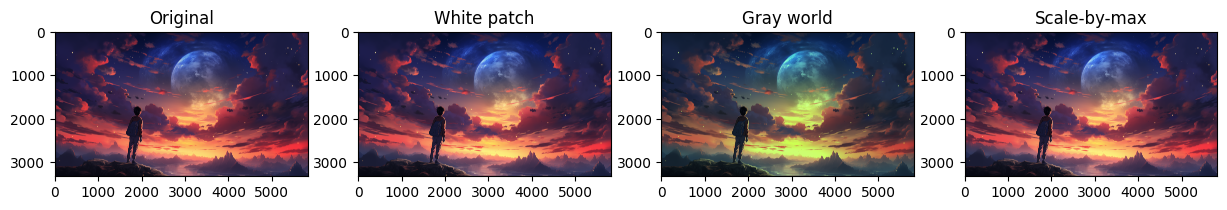

..\data\1349488.jpeg


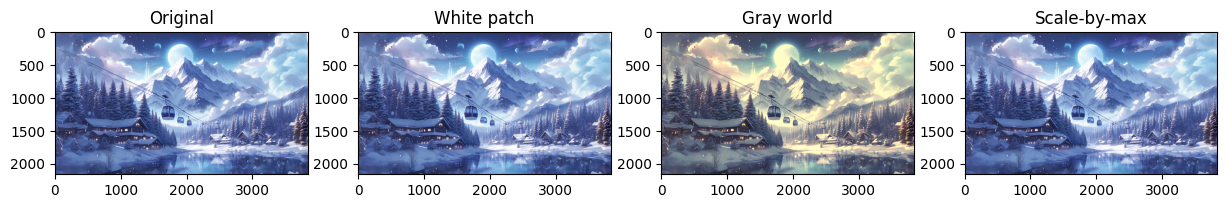

..\data\1350497.png


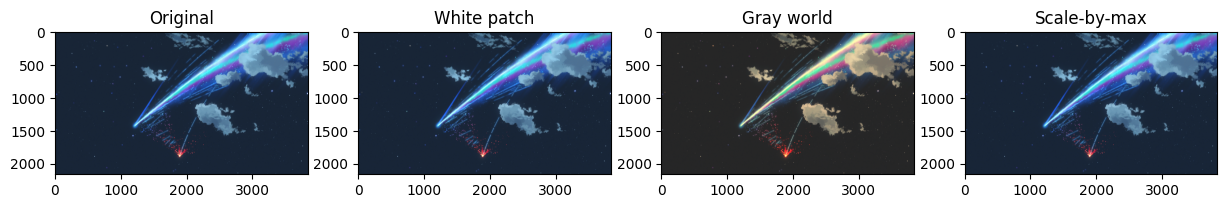

..\data\1351987.jpeg


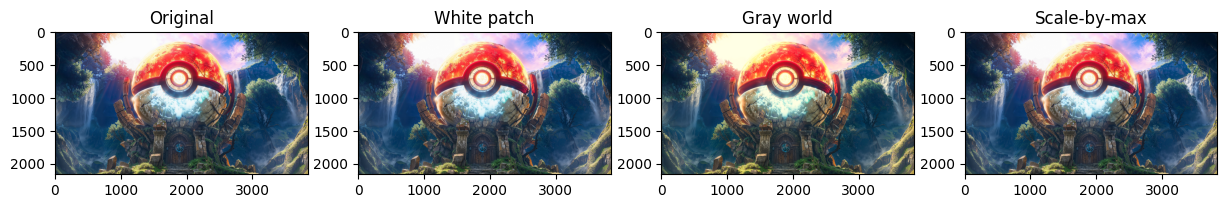

..\data\1354206.jpeg


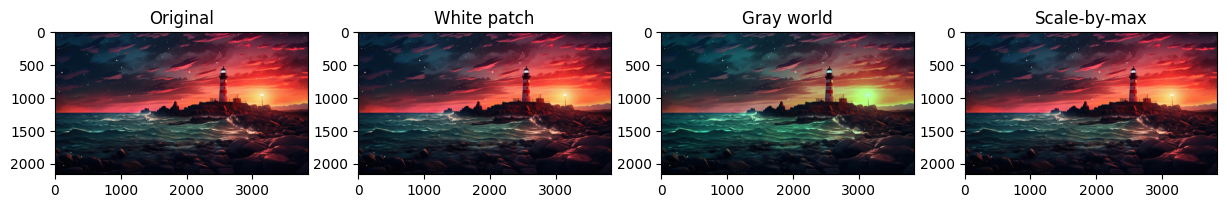

..\data\43600825d9abb54db2aeeadadecf463b.jpg


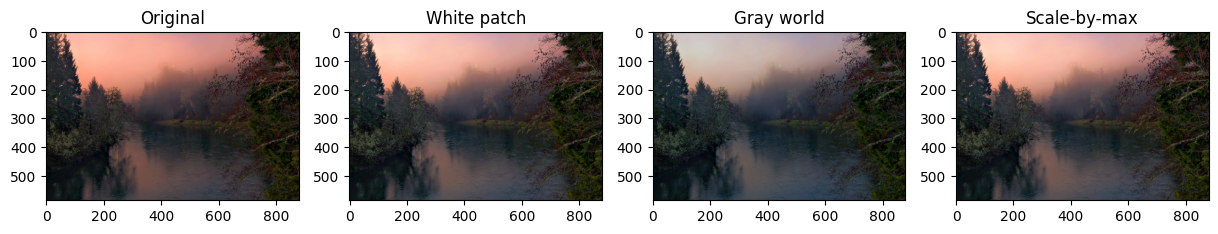

..\data\987919.jpg


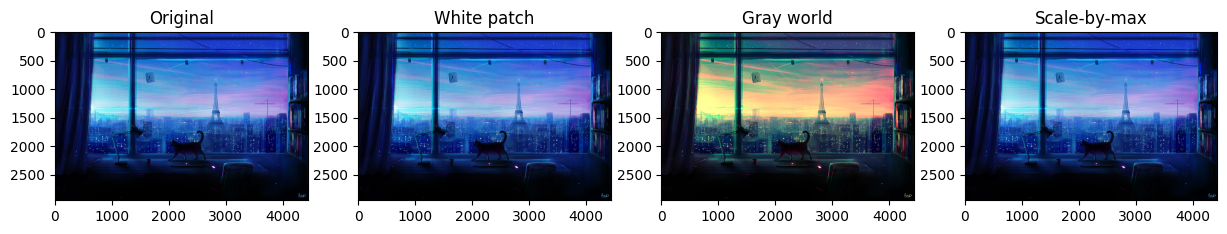

..\data\dark.png


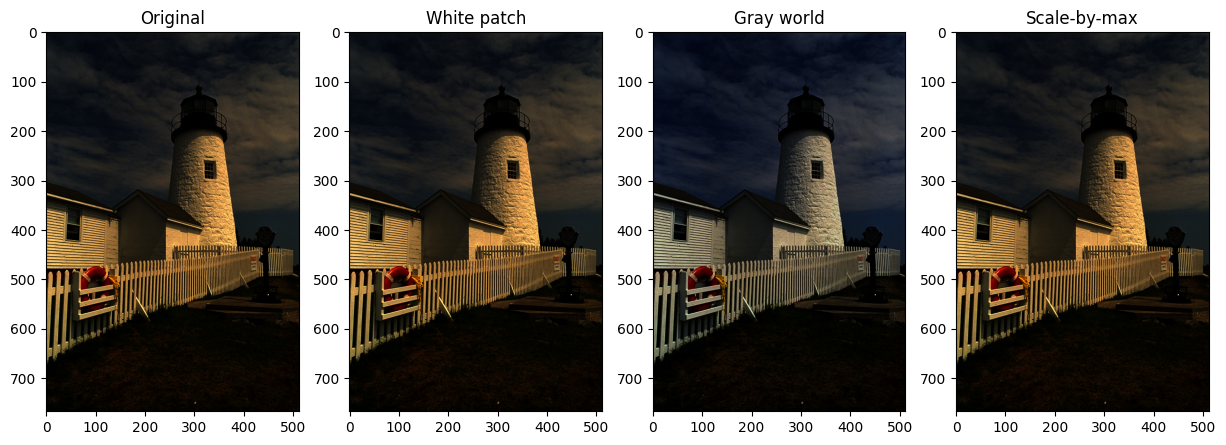

..\data\kodim05.jpg


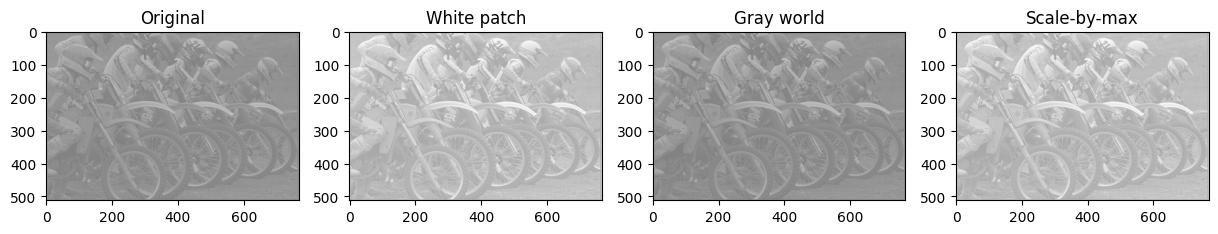

..\data\kodim21.png


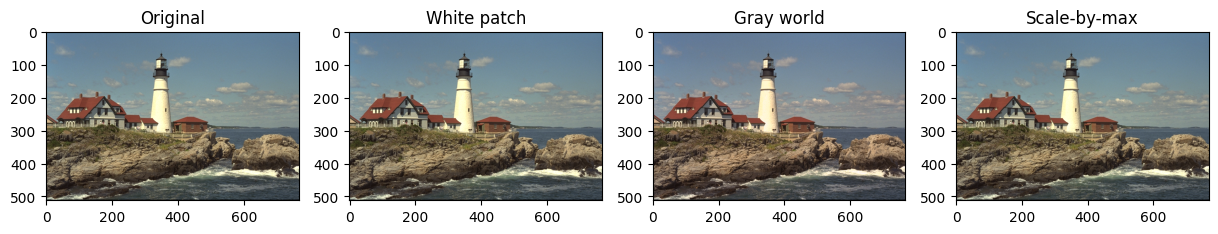

..\data\nikita-pishchugin-KDQ1BH-I3q4-unsplash.jpg


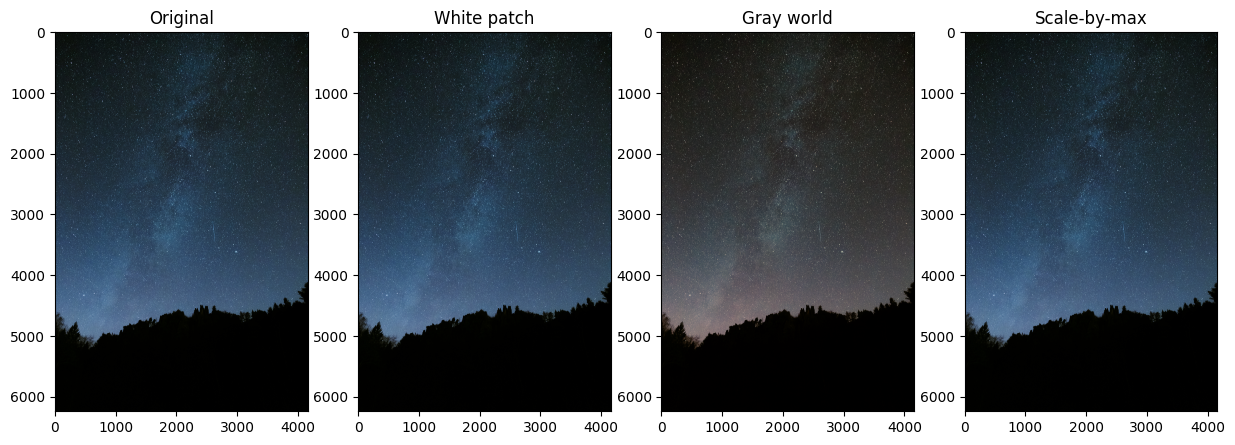

..\data\sea.jpg


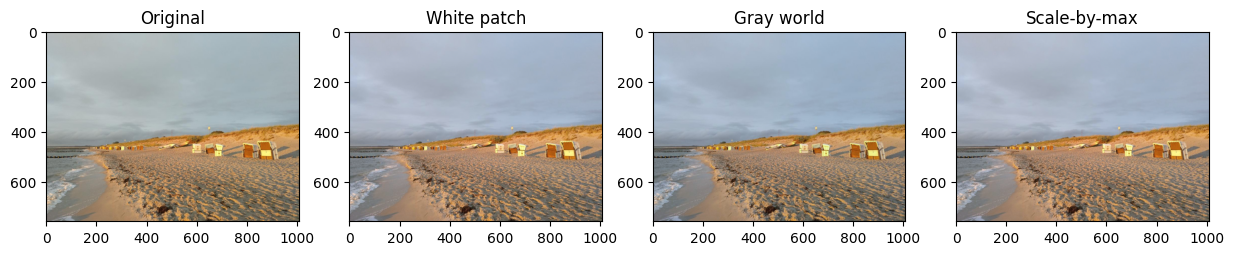

..\data\tire.png


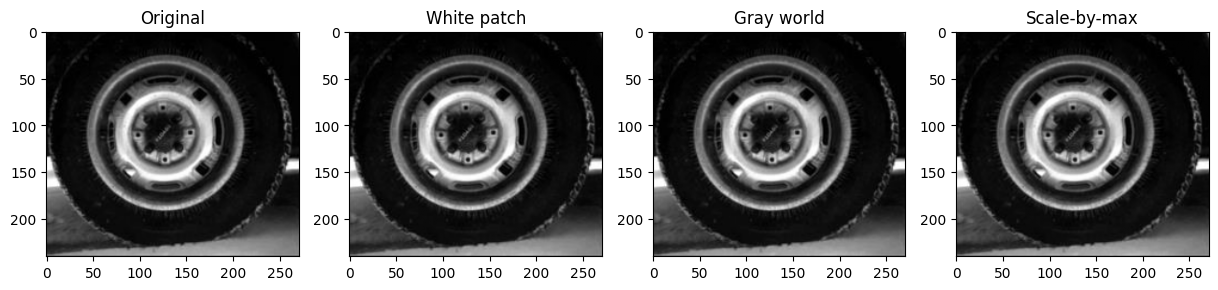

..\data\vivek-7NgbMrUB60A-unsplash.jpg


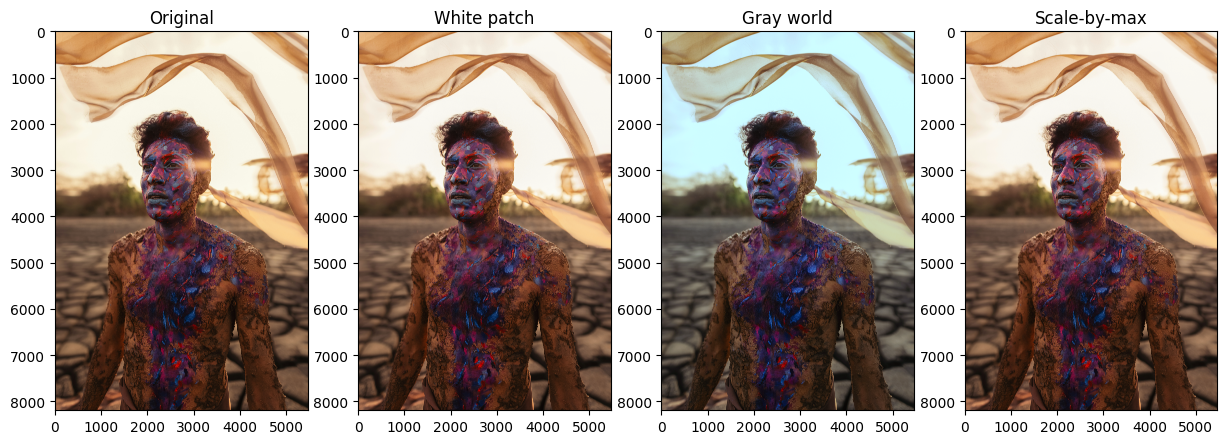

In [151]:
data_dir = Path("../data")
for image_path in data_dir.iterdir():
    print(image_path)
    image = read_image(image_path)

    image_w = white_patch(image, 100)
    image_g = gray_world(image)
    image_s = scale_by_max(image)
    show_compare([image, image_w, image_g, image_s], ["Original", "White patch", "Gray world", "Scale-by-max"]) # 

    # break